Building a Stock Option Valuation Model with Python
Following examples by Jacob Linger at [Medium](https://medium.com/@jacoblingerr/building-a-stock-option-valuation-model-with-python-part-i-faa7bc5be5b1#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6ImEyOWFiYzE5YmUyN2ZiNDE1MWFhNDMxZTk0ZmEzNjgwYWU0NThkYTUiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJuYmYiOjE2NzMyNzkwMjksImF1ZCI6IjIxNjI5NjAzNTgzNC1rMWs2cWUwNjBzMnRwMmEyamFtNGxqZGNtczAwc3R0Zy5hcHBzLmdvb2dsZXVzZXJjb250ZW50LmNvbSIsInN1YiI6IjExMzUxODUwNDcxMzI3Mjc1NzUyNiIsImVtYWlsIjoiaGlnZ2luYm90aGFtLnRob21hc0BnbWFpbC5jb20iLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwiYXpwIjoiMjE2Mjk2MDM1ODM0LWsxazZxZTA2MHMydHAyYTJqYW00bGpkY21zMDBzdHRnLmFwcHMuZ29vZ2xldXNlcmNvbnRlbnQuY29tIiwibmFtZSI6IlRob21hcyBIaWdnaW5ib3RoYW0iLCJwaWN0dXJlIjoiaHR0cHM6Ly9saDMuZ29vZ2xldXNlcmNvbnRlbnQuY29tL2EvQUVkRlRwN0hJdHZwcDFEbmZNdHBsWDhrN0hMSi1hMXVfUFZRWV9UV2FTbHIyQT1zOTYtYyIsImdpdmVuX25hbWUiOiJUaG9tYXMiLCJmYW1pbHlfbmFtZSI6IkhpZ2dpbmJvdGhhbSIsImlhdCI6MTY3MzI3OTMyOSwiZXhwIjoxNjczMjgyOTI5LCJqdGkiOiJmM2JiY2YwOGQxZGVjOTM3ZmNhNmFhZWM4MTU4NWM5OWRlN2YyNDQzIn0.hsf3KoeG01t8vy04s9PA7Cp7WMLv221hAC14X0K7GdqIaOy-hm2Qm0EPTtxJnNlY0tBvC73TLRYLkOm9siYOxh4X_upz_x_R8YNB95C_vCZ5RucOtYONHQKNCgtAMzTt8riEuhpcAb-YC8E3OW1ZI4iIMPi_l-YbrtG06Q56-s3usPGRvF9kzX_-6qUHjtSczOkP81m6ydDFNsJGZ_EtB14BSBRSPMPX1YnuNLJmrIyySDchSOpOQB0ZFh33-T5VT1l4vWBDhxgdpGNJN6C-k3JK2eAPCmEIK5Ju2WJueUfnrzD1U4yIsRUsIK38olCuPScBAKxxcJ-IiNHyzkUw3w)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dfply import *
import yfinance as yf
from ordered_set import OrderedSet
import random
from copy import copy
from yahoo_fin.stock_info import *
from yahoo_fin.options import *
import math
from datetime import date
from datetime import datetime
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#Generating S&P 500 List of Stocks

sp_list = tickers_sp500()

In [3]:
#expiration dates for the first ticker in sp_list

get_expiration_dates(sp_list[0])

['January 20, 2023',
 'February 17, 2023',
 'May 19, 2023',
 'August 18, 2023',
 'January 19, 2024',
 'January 17, 2025']

In [4]:
#Looking at the SECOND expiration date
#Creating options dataset

expiration = get_expiration_dates(sp_list[0])[1] #first ticker, second expiration date
options_df = pd.DataFrame()

for stock in sp_list:
    try:
        price = get_live_price(stock)
        option = get_calls(stock, expiration)
        option['CurrentPrice'] = price
        option['Ticker'] = stock
        option['DateExp'] = expiration
        options_df = options_df.append(option)
        #print(price)
        #print(stock)
    except:
        print('Option contract not available on '+str(stock)+' for expiration date '+ str(expiration))
        pass

Option contract not available on GEHC for expiration date February 17, 2023
Option contract not available on NVR for expiration date February 17, 2023
Option contract not available on NWS for expiration date February 17, 2023


In [5]:
#the resulting options_df dataframe:

options_df

,Contract Name,Last Trade Date,Strike,Last Price,Bid,Ask,Change,% Change,Volume,Open Interest,Implied Volatility,CurrentPrice,Ticker,DateExp
0,A230217C00090000,2022-09-23 2:50PM EST,90.0,36.00,41.4,43.6,0.00,-,1,1,0.00%,147.490005,A,"February 17, 2023"
1,A230217C00100000,2022-08-17 1:34PM EST,100.0,46.60,32.6,33.4,0.00,-,7,3,0.00%,147.490005,A,"February 17, 2023"
2,A230217C00110000,2022-12-05 11:25AM EST,110.0,44.53,40.6,43.5,0.00,-,1,1,102.22%,147.490005,A,"February 17, 2023"
3,A230217C00120000,2022-08-09 11:23AM EST,120.0,18.80,20.4,20.8,0.00,-,1,1,0.00%,147.490005,A,"February 17, 2023"
4,A230217C00125000,2022-11-10 2:25PM EST,125.0,24.85,29.5,31.4,0.00,-,2,57,94.37%,147.490005,A,"February 17, 2023"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,ZTS230217C00180000,2022-12-21 2:35PM EST,180.0,0.44,0.05,0.6,0.04,+10.00%,2,30,40.09%,147.059998,ZTS,"February 17, 2023"
11,ZTS230217C00185000,2023-01-03 2:37PM EST,185.0,0.20,0.0,0.5,0.00,-,40,50,42.51%,147.059998,ZTS,"February 17, 2023"
12,ZTS230217C00190000,2022-12-28 12:53PM EST,190.0,0.20,0.0,0.5,0.00,-,-,20,46.29%,147.059998,ZTS,"February 17, 2023"
13,ZTS230217C00195000,2022-12-16 11:47AM EST,195.0,0.30,0.0,0.75,0.00,-,14,1,54.18%,147.059998,ZTS,"February 17, 2023"


In [6]:
#simplifying the data frame, including only required items:

options_df = options_df[['Contract Name', 'Strike','Bid', 'Ask', 'CurrentPrice', 'Volume', 'Open Interest', 'Ticker', 'DateExp']]

In [7]:
options_df

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp
0,A230217C00090000,90.0,41.4,43.6,147.490005,1,1,A,"February 17, 2023"
1,A230217C00100000,100.0,32.6,33.4,147.490005,7,3,A,"February 17, 2023"
2,A230217C00110000,110.0,40.6,43.5,147.490005,1,1,A,"February 17, 2023"
3,A230217C00120000,120.0,20.4,20.8,147.490005,1,1,A,"February 17, 2023"
4,A230217C00125000,125.0,29.5,31.4,147.490005,2,57,A,"February 17, 2023"
...,...,...,...,...,...,...,...,...,...
10,ZTS230217C00180000,180.0,0.05,0.6,147.059998,2,30,ZTS,"February 17, 2023"
11,ZTS230217C00185000,185.0,0.0,0.5,147.059998,40,50,ZTS,"February 17, 2023"
12,ZTS230217C00190000,190.0,0.0,0.5,147.059998,-,20,ZTS,"February 17, 2023"
13,ZTS230217C00195000,195.0,0.0,0.75,147.059998,14,1,ZTS,"February 17, 2023"


In [8]:
#dropping rows with '-' for either the Bid or Ask price

options_df = options_df.drop(options_df[options_df.Bid == '-'].index)
options_df = options_df.drop(options_df[options_df.Ask == '-'].index)

In [9]:
#creating an average price based on the bid and ask prices (most likely price for the option)

options_df['AvgPrice'] = (pd.to_numeric(options_df.Bid) + pd.to_numeric(options_df.Ask)) / 2

In [10]:
options_df

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp,AvgPrice
0,A230217C00090000,90.0,41.4,43.6,147.490005,1,1,A,"February 17, 2023",42.500
2,A230217C00110000,110.0,40.6,43.5,147.490005,1,1,A,"February 17, 2023",42.050
4,A230217C00125000,125.0,29.5,31.4,147.490005,2,57,A,"February 17, 2023",30.450
5,A230217C00130000,130.0,18.1,20.8,147.490005,2,40,A,"February 17, 2023",19.450
6,A230217C00135000,135.0,18.7,20.0,147.490005,1,172,A,"February 17, 2023",19.350
...,...,...,...,...,...,...,...,...,...,...
8,ZTS230217C00170000,170.0,0.3,1.2,147.059998,2,29,ZTS,"February 17, 2023",0.750
9,ZTS230217C00175000,175.0,0.0,0.7,147.059998,2,5,ZTS,"February 17, 2023",0.350
10,ZTS230217C00180000,180.0,0.05,0.6,147.059998,2,30,ZTS,"February 17, 2023",0.325
11,ZTS230217C00185000,185.0,0.0,0.5,147.059998,40,50,ZTS,"February 17, 2023",0.250


In [11]:
#Creating columns for the total option cost and breakeven percentage

options_df['OptionCost'] = options_df['AvgPrice'] * 100

options_df['BE_percent'] = ((options_df.Strike) + options_df.AvgPrice/(options_df.CurrentPrice)) - 1

In [12]:
options_df

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp,AvgPrice,OptionCost,BE_percent
0,A230217C00090000,90.0,41.4,43.6,147.490005,1,1,A,"February 17, 2023",42.500,4250.0,89.288155
2,A230217C00110000,110.0,40.6,43.5,147.490005,1,1,A,"February 17, 2023",42.050,4205.0,109.285104
4,A230217C00125000,125.0,29.5,31.4,147.490005,2,57,A,"February 17, 2023",30.450,3045.0,124.206455
5,A230217C00130000,130.0,18.1,20.8,147.490005,2,40,A,"February 17, 2023",19.450,1945.0,129.131873
6,A230217C00135000,135.0,18.7,20.0,147.490005,1,172,A,"February 17, 2023",19.350,1935.0,134.131195
...,...,...,...,...,...,...,...,...,...,...,...,...
8,ZTS230217C00170000,170.0,0.3,1.2,147.059998,2,29,ZTS,"February 17, 2023",0.750,75.0,169.005100
9,ZTS230217C00175000,175.0,0.0,0.7,147.059998,2,5,ZTS,"February 17, 2023",0.350,35.0,174.002380
10,ZTS230217C00180000,180.0,0.05,0.6,147.059998,2,30,ZTS,"February 17, 2023",0.325,32.5,179.002210
11,ZTS230217C00185000,185.0,0.0,0.5,147.059998,40,50,ZTS,"February 17, 2023",0.250,25.0,184.001700


In [13]:
# function to generate a payoff

def price_percent_payoff(x, row): #x is in decimal format
    new_price = row.CurrentPrice * (1 + x)
    if (100*new_price - 100*row.Strike - row.OptionCost) >= 0:
        payoff = 100*new_price - 100*row.Strike - row.OptionCost
    else:
            payoff = -(row.OptionCost)
    return(payoff)

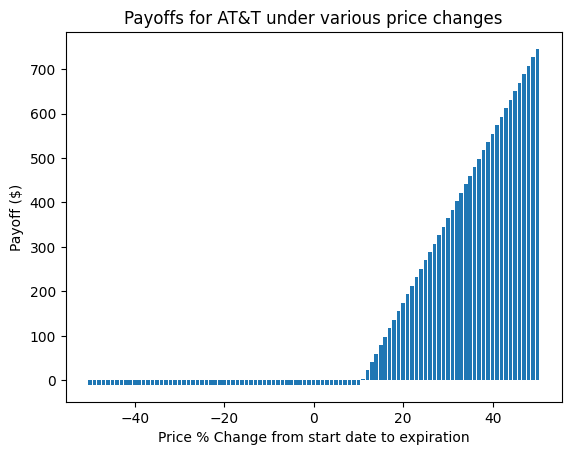

In [14]:
#Generate payoffs for an AT&T (T) option

x_axis = np.arange(-50, 51, 1)
payoffs = []
for p in range(len(x_axis)):
   percent = (p - 50)*0.01
   payoff = price_percent_payoff(
   percent,options_df[options_df.Ticker == 'T'].iloc[5])
   payoffs.append(payoff)
plt.bar(x_axis, payoffs)
plt.xlabel('Price % Change from start date to expiration')
plt.ylabel('Payoff ($)')
plt.title('Payoffs for AT&T under various price changes');
plt.savefig('T_prices.png', dpi = 800)

In [15]:
# show prices uner the breakeven percent change
# Any price under this results in a loss equal to the full price of the option contract.

options_df[options_df.Ticker == 'T'].iloc[5]['BE_percent']

20.00551470561718

In [16]:
# showing all of the AT&T option prices

options_df[options_df.Ticker == 'T']
#.iloc[5]
# T230217C00021000

,Contract Name,Strike,Bid,Ask,CurrentPrice,Volume,Open Interest,Ticker,DateExp,AvgPrice,OptionCost,BE_percent
0,T230217C00011000,11.0,8.1,8.2,19.040001,1,2,T,"February 17, 2023",8.150,815.0,10.428046
2,T230217C00015000,15.0,4.05,4.25,19.040001,2,0,T,"February 17, 2023",4.150,415.0,14.217962
4,T230217C00017000,17.0,2.25,2.31,19.040001,57,347,T,"February 17, 2023",2.280,228.0,16.119748
5,T230217C00018000,18.0,1.42,1.47,19.040001,14,1074,T,"February 17, 2023",1.445,144.5,17.075893
6,T230217C00019000,19.0,0.72,0.77,19.040001,899,66581,T,"February 17, 2023",0.745,74.5,18.039128
8,T230217C00021000,21.0,0.1,0.11,19.040001,785,5247,T,"February 17, 2023",0.105,10.5,20.005515
9,T230217C00022000,22.0,0.03,0.04,19.040001,93,237,T,"February 17, 2023",0.035,3.5,21.001838
10,T230217C00023000,23.0,0.01,0.02,19.040001,2,8,T,"February 17, 2023",0.015,1.5,22.000788
11,T230217C00024000,24.0,0.0,0.03,19.040001,2,5,T,"February 17, 2023",0.015,1.5,23.000788
14,T230217C00030000,30.0,0.0,0.03,19.040001,4,4,T,"February 17, 2023",0.015,1.5,29.000788


Part 2

In [31]:
#Importing required modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import datetime
import dateutil.parser

#Gets a stock ticker, duration (time period to estimate the price change over), and sample size
def delta_dist(ticker, duration, sample_size):
   stock = get_data(ticker).close
   dates = list(stock.index)
   duration = int(duration)
   sample_size = int(sample_size)
   deltas = []
   for s in range(sample_size):
      try:
         x = random.randint(0, (sample_size - 1))
         start = stock[x]
         stop = stock[x + duration]
         difference_percent = (stop - start)/start
         deltas.append(difference_percent)
      except:
         pass
   return deltas

In [25]:
#binned() gives the frequency that a price change falls within each 1% interval
def binned(diffs):
   bins = []
   for bin in range(101):    #needs to be 101 to count -50% and +50%
      begin = (bin - 50)*0.01
      def between_bins(k):
         return (k <= begin + .01) and (k > begin)
      count = list(filter(between_bins, diffs))
      amount = len(count)/len(diffs)  #amount is percent of total
      bins.append(amount)
   return(bins)

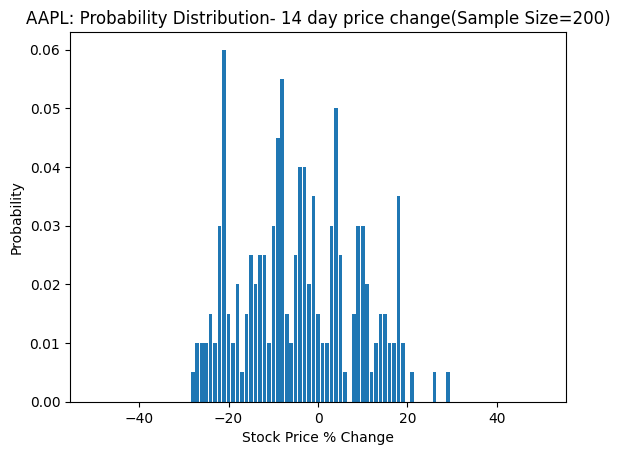

In [26]:
#EXAMPLE : Apple, SAMPLE SIZE 200, 14 day price change
changes = delta_dist('AAPL', 14, 200)
binned_changes = binned(changes)
x_axis = np.arange(-50, 51, 1)
plt.bar(x_axis, binned_changes)
plt.xlabel('Stock Price % Change')
plt.ylabel('Probability')
plt.title('AAPL: Probability Distribution- 14 day price change(Sample Size=200)');
plt.savefig('AAPL_prices.png', dpi = 800)

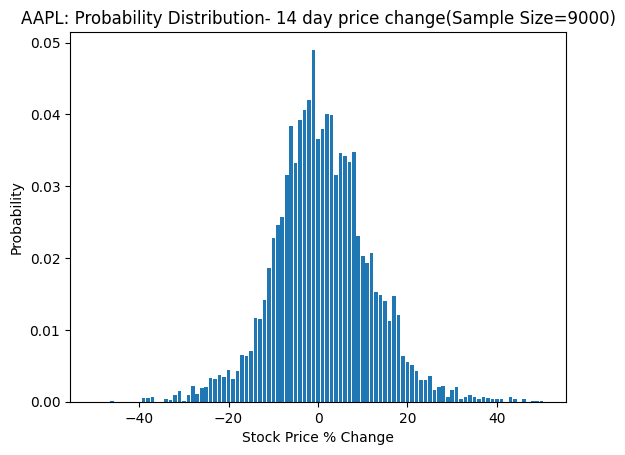

In [27]:
#EXAMPLE : SAMPLE SIZE 9000
changes = delta_dist('AAPL', 14, 9000)
binned_changes = binned(changes)
x_axis = np.arange(-50, 51, 1)
plt.bar(x_axis, binned_changes)
plt.xlabel('Stock Price % Change')
plt.ylabel('Probability')
plt.title('AAPL: Probability Distribution- 14 day price change(Sample Size=9000)');
plt.savefig('AAPL_prices.png', dpi = 800)

Over 9000 days, the distribution appears much more normal than the 200 day sample

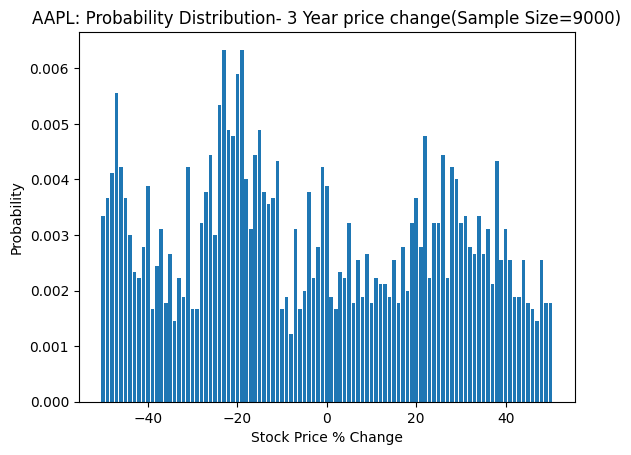

In [28]:
#EXAMPLE : SAMPLE SIZE 9000 for 1095 days (3 years)
changes = delta_dist('AAPL', 1095, 9000)
binned_changes = binned(changes)
x_axis = np.arange(-50, 51, 1)
plt.bar(x_axis, binned_changes)
plt.xlabel('Stock Price % Change')
plt.ylabel('Probability')
plt.title('AAPL: Probability Distribution- 3 Year price change(Sample Size=9000)');
plt.savefig('AAPL_prices.png', dpi = 800)

With a longer timeframe, it is more likely to see larger swings in price (compared to a shorter timeframe)

In [36]:
#Generate time lapse between today and expiration of options contract:

timedate_until_exp = datetime.datetime.strptime(expiration, '%B %d, %Y') - datetime.datetime.today()
#convert day number to integer:
time_until_exp = int(timedate_until_exp.days)
scenario_tickers = list(set(options_df.Ticker))
number_of_tickers = len(scenario_tickers)
simulations = 2000

#dict_of_stuff will contain each ticker key corresponding to the 101 values of its distribution of price changes [-50%, 50%]

dict_of_probs = dict()
for stock in scenario_tickers:     
   changes = delta_dist(stock, time_until_exp, simulations)
   distribution_list = binned(changes)  
   dict_of_probs.update({stock : distribution_list}) 

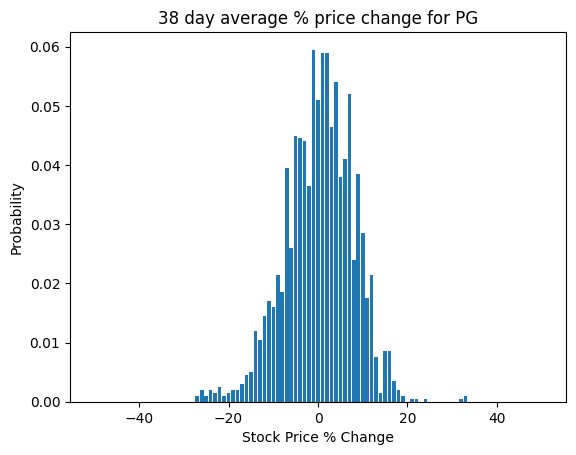

In [37]:
#Verify it works with example
x_axis = np.arange(-50, 51, 1)
example = random.randint(0, number_of_tickers - 1)

plt.bar(x_axis, dict_of_probs[scenario_tickers[example]])
plt.xlabel('Stock Price % Change')
plt.ylabel('Probability')
plt.title(str(time_until_exp) + " day average % price change for " + str(scenario_tickers[example]))
plt.savefig('price_example.png', dpi = 800)

In [38]:
#Generating expected payoffs
x_axis = np.arange(-50, 51, 1)
ExpectedPay = []
for i in range(len(options_df)):
   payoffs = []
   ticker = options_df.iloc[i].Ticker
   for p in range(len(x_axis)):
      percent = (p - 50)*0.01
      payoff = price_percent_payoff(percent, options_df.iloc[i])
      payoffs.append(payoff)
   probs = dict_of_probs[ticker]
   expected_value = sum( np.array(probs) * np.array(payoffs) )
   ExpectedPay.append(expected_value)
options_df['ExpectedPay'] = ExpectedPay

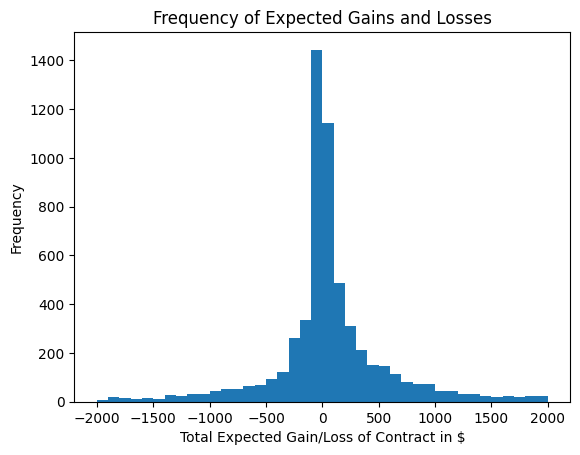

In [39]:
#plot of expected payoffs
plt.hist(ExpectedPay, bins = 40, range=[-2000, 2000])
plt.xlabel('Total Expected Gain/Loss of Contract in $')
plt.ylabel('Frequency')
plt.title("Frequency of Expected Gains and Losses");
plt.savefig('payoffs.png', dpi = 800)

Most options have an expected payoff around $0, this is expected and normal.